# RSS Testing

Compare 3 methods of RSS feed collection:
- Current MediaCloud API https://github.com/berkmancenter/mediacloud/blob/master/doc/api_2_0_spec/api_2_0_spec.md
- Python feed_seeker library https://github.com/mitmedialab/feed_seeker
- Manually generated list https://github.com/berkmancenter/mediacloud/issues/333

In [102]:
## Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas 
from datetime import datetime
import seaborn as sns
import glob
from os.path import basename
sns.set_context('poster')
import re
import csv

## Read manual list

In [15]:
df_sources = pandas.read_csv('../data/random-sources.txt')

In [17]:
df_sources.head()

media_id                                         url
0      1747  http://www.dailymail.co.uk/home/index.html
1      1750                 http://www.telegraph.co.uk/
2     20120                           http://www.nj.com
3         1                          http://nytimes.com
4         9              http://www.chicagotribune.com/

### Here's the list of media sources we're testing. There should be 50. But there are 48.


In [54]:
media_ids = list(df_sources.media_id)
print(len(media_ids))
print(len(set(media_ids)))

50
48


In [29]:
df = pandas.read_csv('../data/feeds-manual.csv')

In [30]:
df.head()

media_id                             url  \
0      1750     http://www.telegraph.co.uk/   
1      1750     http://www.telegraph.co.uk/   
2      1750     http://www.telegraph.co.uk/   
3         9  http://www.chicagotribune.com/   
4         9  http://www.chicagotribune.com/   

                                            feed_url  
0     http://announcements.telegraph.co.uk/rss-feeds  
1      https://www.telegraph.co.uk/finance/rssfeeds/  
2  https://feedly.com/i/subscription/feed%2Fhttp%...  
3  http://www.chicagotribune.com/news/local/break...  
4  http://www.chicagotribune.com/business/rss2.0.xml

In [48]:
len(set(list(df.feed_url)))

1522

In [51]:
len(set(list(df.media_id)))

42

In [40]:
sources_dict = df_sources.to_dict('records')
sources_dict[0]

{'media_id': 1747, 'url': 'http://www.dailymail.co.uk/home/index.html'}

### What's up with the missing sources in the manually generated one?


In [58]:
set(media_ids) - set(list(df.media_id))

{29812, 57174, 118429, 348065, 385113, 385125}

In [63]:
set(df_sources.url) - set(df.url)

{'http://cn.linkedin.com/',
 'http://in.news.yahoo.com#spider',
 'http://wkrg.com/',
 'http://www.superiodicoaldia.com/',
 'http://www.theheritagenews.com/',
 'http://www.viasat1.com.gh/vone/'}

## Setup MC API

In [4]:
import mediacloud, json, datetime
mc = mediacloud.api.MediaCloud('7e5510da993cd51097818a48374dff44495cb251f859ec01d61aaae59284fb6c')

In [72]:
with open('../data/feeds-via-API.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['media_id','url','feed_url']) 
    for i in range(len(sources_dict)):
        source = sources_dict[i]
        
        print("SOURCE: " + str(i+1) + " " + source['url'])
        feeds = mc.feedList(source['media_id'])
        print(len(feeds))
        for feed in feeds:
            spamwriter.writerow([source['media_id'], source['url'], feed['url']])
            print(feed['url'])
        print("\n")
            

SOURCE: 1 http://www.dailymail.co.uk/home/index.html
20
http://www.dailymail.co.uk/news/columnist-1001421/alex-brummer.rss
http://www.dailymail.co.uk/femail/columnist-1005042/alexandra-shulman.rss
http://www.dailymail.co.uk/news/columnist-323/allison-pearson.rss
http://www.dailymail.co.uk/news/columnist-463/amanda-platell.rss
http://www.dailymail.co.uk/tvshowbiz/azstar/archives/amy-winehouse.rss
http://www.dailymail.co.uk/news/columnist-248/andrew-alexander.rss
http://www.dailymail.co.uk/news/columnist-1041755/andrew-pierce.rss
http://www.dailymail.co.uk/sport/columnist-1031773/andy-roddick.rss
http://www.dailymail.co.uk/sport/columnist-1040409/andy-townsend.rss
http://www.dailymail.co.uk/sport/teampages/arsenal.rss
http://www.dailymail.co.uk/sport/columnist-1000161/ash-wednesday.rss
http://www.dailymail.co.uk/sport/teampages/aston-villa.rss
http://www.dailymail.co.uk/tvshowbiz/columnist-1000601/baz-bamigboye.rss
http://www.dailymail.co.uk/femail/columnist-465/bel-mooney.rss
http://www

2
http://newsok.com
spider:http://newsok.com


SOURCE: 14 http://telesurtv.net/
9
http://www.telesurtv.net/rss
http://telesurtv.net/
http://www.telesurtv.net/rss/RssLatinoamerica.html
http://www.telesurtv.net/rss/RssCultura.html
http://www.telesurtv.net/rss/RssDeporte.html
http://www.telesurtv.net/rss/RssPortada.html
http://www.telesurtv.net/rss/RssOpinion.xml
http://www.telesurtv.net/rss/RssMundo.html
http://www.telesurtv.net/rss/RssBlogs.xml


SOURCE: 15 http://www.rightwingwatch.org
4
http://www.rightwingwatch.org
http://www.rightwingwatch.org/rss.xml
http://www.rightwingwatch.org/feed/
MediaWords::ImportStories::Feedly:http://www.rightwingwatch.org


SOURCE: 16 http://www.commentarymagazine.com/blogs
12
http://www.commentarymagazine.com/blogs/index.php/feed
http://www.commentarymagazine.com/blogs/index.php/category/connecting-the-dots/feed
http://www.commentarymagazine.com/blogs/index.php/category/contentions/feed
http://www.commentarymagazine.com/blogs/index.php/category/the-horiz

2
http://in.news.yahoo.com#spider
https://in.news.yahoo.com/rss


SOURCE: 40 http://indiatoday.intoday.in/#spider
20
http://indiatoday.intoday.in/#spider
http://indiatoday.intoday.in/rss/homepage-topstories.jsp
http://indiatoday.intoday.in/rss/article.jsp?sid=120
http://indiatoday.intoday.in/rss/article.jsp?sid=150
http://indiatoday.intoday.in/rss/article.jsp?sid=149
http://indiatoday.intoday.in/rss/article.jsp?sid=146
http://indiatoday.intoday.in/rss/article.jsp?sid=27
http://indiatoday.intoday.in/rss/article.jsp?sid=41
http://indiatoday.intoday.in/rss/article.jsp?sid=21
http://indiatoday.intoday.in/rss/article.jsp?sid=25
http://indiatoday.intoday.in/rss/article.jsp?sid=24
http://indiatoday.intoday.in/rss/article.jsp?sid=36
http://indiatoday.intoday.in/rss/article.jsp?sid=85
http://indiatoday.intoday.in/rss/article.jsp?sid=61
http://indiatoday.intoday.in/rss/article.jsp?sid=34
http://indiatoday.intoday.in/rss/article.jsp?sid=30
http://indiatoday.intoday.in/rss/gallery.jsp?pcid=0
http:

### Way more sources manually... compare a few

In [85]:
df[df.media_id==1]

media_id                 url  \
1190         1  http://nytimes.com   
1191         1  http://nytimes.com   
1192         1  http://nytimes.com   
1193         1  http://nytimes.com   
1194         1  http://nytimes.com   
1195         1  http://nytimes.com   
1196         1  http://nytimes.com   
1197         1  http://nytimes.com   
1198         1  http://nytimes.com   
1199         1  http://nytimes.com   
1200         1  http://nytimes.com   
1201         1  http://nytimes.com   
1202         1  http://nytimes.com   
1203         1  http://nytimes.com   
1204         1  http://nytimes.com   
1205         1  http://nytimes.com   
1206         1  http://nytimes.com   
1207         1  http://nytimes.com   
1208         1  http://nytimes.com   
1209         1  http://nytimes.com   
1210         1  http://nytimes.com   
1211         1  http://nytimes.com   
1212         1  http://nytimes.com   
1213         1  http://nytimes.com   
1214         1  http://nytimes.com   
1215         1  http://nytimes.com   
1216         1  http://nytimes.com   
1217         1  http://nytimes.com   
1218         1  http://nytimes.com   
1219         1  http://nytimes.com   
...        ...                 ...   
1294         1  http://nytimes.com   
1295         1  http://nytimes.com   
1296         1  http://nytimes.com   
1297         1  http://nytimes.com   
1298         1  http://nytimes.com   
1299         1  http://nytimes.com   
1300         1  http://nytimes.com   
1301         1  http://nytimes.com   
1302         1  http://nytimes.com   
1303         1  http://nytimes.com   
1304         1  http://nytimes.com   
1305         1  http://nytimes.com   
1306         1  http://nytimes.com   
1307         1  http://nytimes.com   
1308         1  http://nytimes.com   
1309         1  http://nytimes.com   
1310         1  http://nytimes.com   
1311         1  http://nytimes.com   
1312         1  http://nytimes.com   
1313         1  http://nytimes.com   
1314         1  http://nytimes.com   
1315         1  http://nytimes.com   
1316         1  http://nytimes.com   
1317         1  http://nytimes.com   
1318         1  http://nytimes.com   
1319         1  http://nytimes.com   
1320         1  http://nytimes.com   
1321         1  http://nytimes.com   
1322         1  http://nytimes.com   
1323         1  http://nytimes.com   

                                               feed_url  
1190  http://rss.nytimes.com/services/xml/rss/nyt/Ho...  
1191  http://rss.nytimes.com/services/xml/rss/nyt/Wo...  
1192              https://atwar.blogs.nytimes.com/feed/  
1193  http://rss.nytimes.com/services/xml/rss/nyt/Af...  
1194  http://rss.nytimes.com/services/xml/rss/nyt/Am...  
1195  http://rss.nytimes.com/services/xml/rss/nyt/As...  
1196  http://rss.nytimes.com/services/xml/rss/nyt/Eu...  
1197  http://rss.nytimes.com/services/xml/rss/nyt/Mi...  
1198  http://rss.nytimes.com/services/xml/rss/nyt/US...  
1199  http://rss.nytimes.com/services/xml/rss/nyt/Ed...  
1200            https://learning.blogs.nytimes.com/feed  
1201  http://rss.nytimes.com/services/xml/rss/nyt/Po...  
1202  http://rss.nytimes.com/services/xml/rss/nyt/Up...  
1203  http://rss.nytimes.com/services/xml/rss/nyt/NY...  
1204           https://cityroom.blogs.nytimes.com/feed/  
1205          http://fort-greene.blogs.nytimes.com/feed  
1206                       http://localeastvillage.com/  
1207  http://rss.nytimes.com/services/xml/rss/nyt/Bu...  
1208  http://rss.nytimes.com/services/xml/rss/nyt/En...  
1209  http://rss.nytimes.com/services/xml/rss/nyt/Sm...  
1210                https://boss.blogs.nytimes.com/feed  
1211  http://rss.nytimes.com/services/xml/rss/nyt/Ec...  
1212  https://rss.nytimes.com/services/xml/rss/nyt/D...  
1213  http://rss.nytimes.com/services/xml/rss/nyt/Me...  
1214  http://rss.nytimes.com/services/xml/rss/nyt/Yo...  
1215  http://rss.nytimes.com/services/xml/rss/nyt/Te...  
1216               https://bits.blogs.nytimes.com/feed/  
1217  http://rss.nytimes.

In [86]:
df[df.media_id==1].to_csv('../data/nyt-manual.csv') ## Load as a DF for easy processing.

In [80]:
df_api = pandas.read_csv('../data/feeds-via-API.csv')

In [93]:
df_api[df_api.media_id == 1]

media_id                 url  \
60         1  http://nytimes.com   
61         1  http://nytimes.com   
62         1  http://nytimes.com   
63         1  http://nytimes.com   
64         1  http://nytimes.com   
65         1  http://nytimes.com   
66         1  http://nytimes.com   
67         1  http://nytimes.com   
68         1  http://nytimes.com   
69         1  http://nytimes.com   
70         1  http://nytimes.com   
71         1  http://nytimes.com   
72         1  http://nytimes.com   
73         1  http://nytimes.com   
74         1  http://nytimes.com   
75         1  http://nytimes.com   
76         1  http://nytimes.com   
77         1  http://nytimes.com   
78         1  http://nytimes.com   
79         1  http://nytimes.com   

                                             feed_url  
60             http://bits.blogs.nytimes.com/rss2.xml  
61         http://dealbook.blogs.nytimes.com/rss2.xml  
62     http://feeds.feedburner.com/essentialknowledge  
63  http://www.nytimes.com/services/xml/rss/nyt/Af...  
64  http://www.nytimes.com/services/xml/rss/nyt/Am...  
65  http://www.nytimes.com/services/xml/rss/nyt/Ar...  
66  http://www.nytimes.com/services/xml/rss/nyt/Ar...  
67  http://www.nytimes.com/services/xml/rss/nyt/As...  
68  http://www.nytimes.com/services/xml/rss/nyt/Au...  
69  http://www.nytimes.com/services/xml/rss/nyt/Ba...  
70  http://www.nytimes.com/services/xml/rss/nyt/Bo...  
71  http://www.nytimes.com/services/xml/rss/nyt/Bu...  
72  http://www.nytimes.com/services/xml/rss/nyt/Co...  
73  http://www.nytimes.com/services/xml/rss/nyt/Co...  
74  http://www.nytimes.com/services/xml/rss/nyt/Di...  
75  http://www.nytimes.com/services/xml/rss/nyt/Ed...  
76  http://www.nytimes.com/services/xml/rss/nyt/En...  
77  http://www.nytimes.com/services/xml/rss/nyt/Es...  
78  http://www.nytimes.com/services/xml/rss/nyt/Eu...  
79  http://www.nytimes.com/services/xml/rss/nyt/Fa...

In [83]:
df_api[df_api.media_id == 1].to_csv('../data/nyt-API.csv')

### Is the bump caused by outliers/spam?

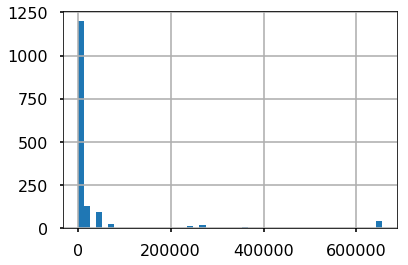

In [103]:
df.media_id.hist(bins=50)

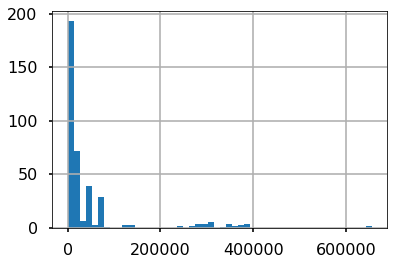

In [104]:
 df_api.media_id.hist(bins=50)

In [107]:
df_api.media_id.value_counts().to_csv('../data/feed-dist-api.csv')

In [121]:
df_api.media_id.value_counts()[:10]

9        40
1750     40
1        20
67799    20
20120    20
1747     20
39784    20
19524    20
2        20
19993    20
Name: media_id, dtype: int64

In [120]:
df.media_id.value_counts()[:10]

1747      971
1         134
39784      81
2          65
20120      50
653591     36
22916      34
19993      27
271601     19
7325       17
Name: media_id, dtype: int64

In [109]:
df.media_id.value_counts().to_csv('../data/feed-dist-manual.csv')

In [119]:
df[df.media_id==1747]

media_id                                         url  \
169       1747  http://www.dailymail.co.uk/home/index.html   
170       1747  http://www.dailymail.co.uk/home/index.html   
171       1747  http://www.dailymail.co.uk/home/index.html   
172       1747  http://www.dailymail.co.uk/home/index.html   
173       1747  http://www.dailymail.co.uk/home/index.html   
174       1747  http://www.dailymail.co.uk/home/index.html   
175       1747  http://www.dailymail.co.uk/home/index.html   
176       1747  http://www.dailymail.co.uk/home/index.html   
177       1747  http://www.dailymail.co.uk/home/index.html   
178       1747  http://www.dailymail.co.uk/home/index.html   
179       1747  http://www.dailymail.co.uk/home/index.html   
180       1747  http://www.dailymail.co.uk/home/index.html   
181       1747  http://www.dailymail.co.uk/home/index.html   
182       1747  http://www.dailymail.co.uk/home/index.html   
183       1747  http://www.dailymail.co.uk/home/index.html   
184       1747  http://www.dailymail.co.uk/home/index.html   
185       1747  http://www.dailymail.co.uk/home/index.html   
186       1747  http://www.dailymail.co.uk/home/index.html   
187       1747  http://www.dailymail.co.uk/home/index.html   
188       1747  http://www.dailymail.co.uk/home/index.html   
189       1747  http://www.dailymail.co.uk/home/index.html   
190       1747  http://www.dailymail.co.uk/home/index.html   
191       1747  http://www.dailymail.co.uk/home/index.html   
192       1747  http://www.dailymail.co.uk/home/index.html   
193       1747  http://www.dailymail.co.uk/home/index.html   
194       1747  http://www.dailymail.co.uk/home/index.html   
195       1747  http://www.dailymail.co.uk/home/index.html   
196       1747  http://www.dailymail.co.uk/home/index.html   
197       1747  http://www.dailymail.co.uk/home/index.html   
198       1747  http://www.dailymail.co.uk/home/index.html   
...        ...                                         ...   
1110      1747  http://www.dailymail.co.uk/home/index.html   
1111      1747  http://www.dailymail.co.uk/home/index.html   
1112      1747  http://www.dailymail.co.uk/home/index.html   
1113      1747  http://www.dailymail.co.uk/home/index.html   
1114      1747  http://www.dailymail.co.uk/home/index.html   
1115      1747  http://www.dailymail.co.uk/home/index.html   
1116      1747  http://www.dailymail.co.uk/home/index.html   
1117      1747  http://www.dailymail.co.uk/home/index.html   
1118      1747  http://www.dailymail.co.uk/home/index.html   
1119      1747  http://www.dailymail.co.uk/home/index.html   
1120      1747  http://www.dailymail.co.uk/home/index.html   
1121      1747  http://www.dailymail.co.uk/home/index.html   
1122      1747  http://www.dailymail.co.uk/home/index.html   
1123      1747  http://www.dailymail.co.uk/home/index.html   
1124      1747  http://www.dailymail.co.uk/home/index.html   
1125      1747  http://www.dailymail.co.uk/home/index.html   
1126      1747  http://www.dailymail.co.uk/home/index.html   
1127      1747  http://www.dailymail.co.uk/home/index.html   
1128      1747  http://www.dailymail.co.uk/home/index.html   
1129      1747  http://www.dailymail.co.uk/home/index.html   
1130      1747  http://www.dailymail.co.uk/home/index.html   
1131      1747  http://www.dailymail.co.uk/home/index.html   
1132      1747  http://www.dailymail.co.uk/home/index.html   
1133      1747  http://www.dailymail.co.uk/home/index.html   
1134      1747  http://www.dailymail.co.uk/home/index.html   
1135      1747  http://www.dailymail.co.uk/home/index.html   
1136      1747  http://www.dailymail.co.uk/home/index.html   
1137      1747  http://www.dailymail.co.uk/home/index.html   
1138      1747  http://www.dailymail.co.uk/home/index.html   
1139      1747  http://www.dailymail.co.uk/home/index.html   

                                               feed_url  
169             http://www.dailymail.co.uk/articles.rss  
170           http://www.dailymail.co.uk/home

### Now, for feed_seeker

In [131]:
from feed_seeker import find_feed_url 

## Using feed seeker's generate feed urls and no spider

In [137]:
from feed_seeker import generate_feed_urls

with open('../data/feeds-via-feedseeker.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['media_id','url','feed_url']) 
    for i in range(len(sources_dict)):
        source = sources_dict[i]
        
        print("SOURCE: " + str(i+1) + " " + source['url'])
        
        #         feeds = generate_feed_urls(source['url'])
        #         print(len(feeds))
        for feed in generate_feed_urls(source['url']):
            spamwriter.writerow([source['media_id'], source['url'], feed])
            print(feed)
        print("\n")
            

SOURCE: 1 http://www.dailymail.co.uk/home/index.html
http://www.dailymail.co.uk/home/index.rss
http://www.dailymail.co.uk/articles.rss
http://www.dailymail.co.uk/home/articles.rss


SOURCE: 2 http://www.telegraph.co.uk/
http://www.telegraph.co.uk/rss
http://www.telegraph.co.uk/rss.xml


SOURCE: 3 http://www.nj.com


SOURCE: 4 http://nytimes.com
http://www.nytimes.com/services/xml/rss/nyt/HomePage.xml
https://rss.art19.com/the-daily


SOURCE: 5 http://www.chicagotribune.com/
http://www.chicagotribune.com/rss2.0.xml


SOURCE: 6 http://tomthunkit.com/


SOURCE: 7 http://www.wmur.com/#spider


SOURCE: 8 http://shareblue.com/
https://shareblue.com/feed/
https://shareblue.com/comments/feed/
http://shareblue.com/feed
http://shareblue.com/?feed=rss
http://shareblue.com/?feed=atom
http://shareblue.com/?feed=rss2
http://shareblue.com/rss
http://shareblue.com/atom
http://shareblue.com/data/rss


SOURCE: 9 http://grist.org/
https://grist.org/feed/
http://grist.org/atom.xml
http://grist.org/feed
ht



SOURCE: 47 http://www.superiodicoaldia.com/




SOURCE: 48 http://www.elmeridianodesucre.com.co/


SOURCE: 49 http://www.lavozdelnorte.mx


SOURCE: 50 http://elperiodicodeportivo.com.co/
http://elperiodicodeportivo.com.co/rss.xml




In [138]:
df_feedseeker = pandas.read_csv("../data/feeds-via-feedseeker.csv")

In [146]:
len(set(df_feedseeker.media_id))
len(df_feedseeker)

141

## try with timeout


In [150]:
from feed_seeker import generate_feed_urls

with open('../data/feeds-via-feedseeker.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['media_id','url','feed_url']) 
    for i in range(len(sources_dict)):
        source = sources_dict[i]
        
        print("SOURCE: " + str(i+1) + " " + source['url'])
        
        #         feeds = generate_feed_urls(source['url'])
        #         print(len(feeds))
        
        
        try:
            for feed in generate_feed_urls(source['url'], spider=1, max_time=1):
                spamwriter.writerow([source['media_id'], source['url'], feed])
                print(feed)
        except TimeoutError:
            print("timeouterror")
        print("\n")
            

SOURCE: 1 http://www.dailymail.co.uk/home/index.html
timeouterror


SOURCE: 2 http://www.telegraph.co.uk/


ChunkedEncodingError: ("Connection broken: TimeoutError('Timeout reached (1s)',)", TimeoutError('Timeout reached (1s)',))

In [ ]:
# test timeout
for url in ('https://httpstat.us/200?sleep=5000', 'http://www.dailymail.co.uk/home/index.html'):
    try:
        print('found feed:\t{}'.format(find_feed_url(url, max_time=3)))
    except TimeoutError:
         print('skipping {}'.format(url))